In [49]:
# Data Setup and Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

df = pd.read_csv('raw-keywords-12-30-19.csv')
df.head(1)

,Alpha Clicks,Alpha Conversions,Compiled,Beta Impressions,Beta Clicks,Compiled.1,Search term,Match type,Added/Excluded,Campaign,...,Clicks,Impr.,CTR,Currency code,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate,Campaign type
0,Flag,Flag,FlagFlag,Flag,NaN,Flag,blueboard,Exact match,Added,Google_Search_Brand_AllGeos_Alpha,...,282,1148,0.25,USD,0.28,80.32,6,13.39,0.02,Search


In [3]:
df = df[['Search term', 'Match type',
       'Added/Excluded', 'Campaign', 'Type', 'Ad group', 'Clicks', 'Impr.', 'Avg. CPC', 'Cost', 'Conversions']]

### Alpha Beta Charlie Performance

In [4]:
from pandas import pivot_table
abc = pivot_table(df, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Type', aggfunc = sum)
abc = abc[['Impr.','Clicks','Conversions','Cost']]

def ratios(aaa):
    aaa['CTR'] = round((aaa['Clicks']/aaa['Impr.'])*100,2)
    aaa['CR'] = round((aaa['Conversions']/aaa['Clicks'])*100,2)
    aaa['CPA'] = round((aaa['Cost']/aaa['Conversions']),2)
    aaa = aaa[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]

abc['CTR'] = round((abc['Clicks']/abc['Impr.'])*100,2)
abc['CR'] = round((abc['Conversions']/abc['Clicks'])*100,2)
abc['CPA'] = round((abc['Cost']/abc['Conversions']),2)
abc = abc[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
abc

,Impr.,CTR,Clicks,CR,Conversions,Cost,CPA
Type,,,,,,,
Alpha,19579,10.52,2059,0.92,19,5344.56,281.29
Beta,11190,35.13,3931,0.94,37,11948.45,322.93
Charlie,7713,54.79,4226,0.83,35,8481.19,242.32


____________________________________________________________________________

### Charlie Keywords that Converted

In [8]:
charlie = df[df['Type']=='Charlie']
charlie[charlie['Conversions'] > 0]

,Search term,Match type,Added/Excluded,Campaign,Type,Ad group,Clicks,Impr.,Avg. CPC,Cost,Conversions
59,www peopleareeverything com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Rewards,40,77,1.59,63.67,2
106,www awardselect com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,8,36,1.86,14.86,1
164,employee bonus ideas,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Incentive,4,12,2.43,9.73,1
173,https crothallgem workstride com ng login_claim,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,7,10,1.88,13.16,1
210,www hertzcognitions awardco com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,5,3,1.44,7.21,1
213,employee appreciation trip companies,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,1,1,4.67,4.67,2
357,dc37 reward com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Rewards,3,3,1.38,4.13,1
636,employer gifts,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Gifts,1,5,1.18,1.18,1
731,www awardselect com dupagemedical15,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,2,4,1.31,2.62,1
1187,high five rewards,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Rewards,1,2,1.74,1.74,1


________________________________________________________________________________________

### Alpha Performance

In [ ]:
alpha = df[df['Type']=='Alpha']
ag_alpha = pivot_table(alpha, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Ad group', aggfunc = sum)
ag_alpha = ag_alpha[['Impr.','Clicks','Conversions','Cost']]
ratios(ag_alpha) #use function instead

ag_alpha.sort_values('Conversions',ascending=False,inplace=True)
#fix index
ag_alpha = pd.DataFrame(ag_alpha)
ag_alpha['adgroup']=ag_alpha.index
ag_alpha = ag_alpha.reset_index(drop=True)
ag_alpha=ag_alpha[['adgroup','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]

In [8]:
alpha = df[df['Type']=='Alpha']
ag_alpha = pivot_table(alpha, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Ad group', aggfunc = sum)
ag_alpha = ag_alpha[['Impr.','Clicks','Conversions','Cost']]
ratios(ag_alpha) #use function instead
#ag_alpha['CPA'] = round(ag_alpha['Cost']/ag_alpha['Conversions'],2)
#ag_alpha['CTR'] = round((ag_alpha['Clicks']/ag_alpha['Impr.'])*100,2)
#ag_alpha['CR'] = round((ag_alpha['Conversions']/ag_alpha['Clicks'])*100,2)
#ag_alpha = ag_alpha[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
ag_alpha.sort_values('Conversions',ascending=False,inplace=True)
#fix index
ag_alpha = pd.DataFrame(ag_alpha)
ag_alpha['adgroup']=ag_alpha.index
ag_alpha = ag_alpha.reset_index(drop=True)
ag_alpha=ag_alpha[['adgroup','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]

Create a heatmap of how Ad Groups have been performing with conversion rate listed on the plot (and colored) and number of clicks along the x-axis.

Text(0.5, 1, 'Clicks x Conversion Rate Alpha Heatmap')

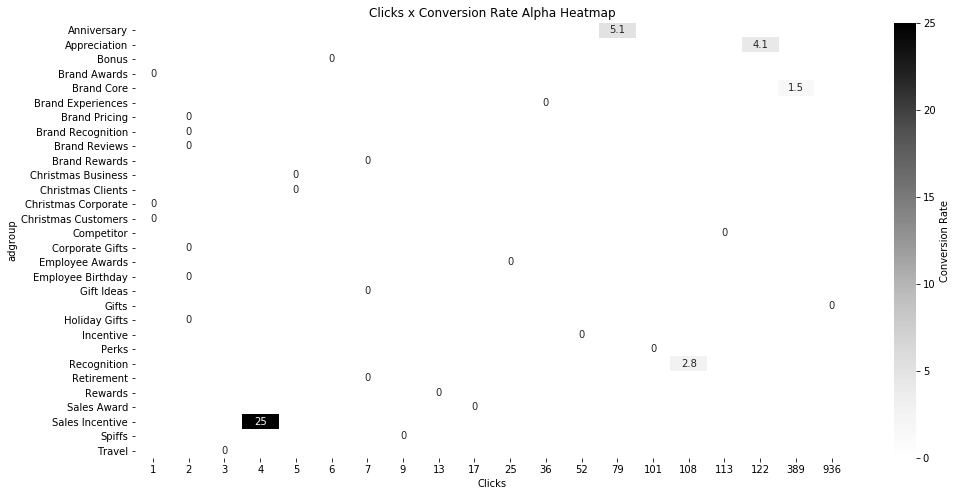

In [6]:
plt.figure(figsize=(16, 8))
sns.heatmap(ag_alpha.pivot("adgroup","Clicks","CR"), cmap="Greys", annot=True, cbar_kws={'label': 'Conversion Rate'})
plt.title('Clicks x Conversion Rate Alpha Heatmap')

`Gifts`,`Competitors`, and `Perks` are all problem campaigns.

Look into `Sales Incentive` and see if we can get more impressions.

# Beta Performance

In [10]:
beta = df[df['Type']=='Beta']
ag_beta = pivot_table(beta, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Ad group', aggfunc = sum)
ag_beta = ag_beta[['Impr.','Clicks','Conversions','Cost']]
ratios(ag_beta) #use function instead

ag_beta.sort_values('Conversions',ascending=False,inplace=True)
#fix index
ag_beta = pd.DataFrame(ag_beta)
ag_beta['adgroup']=ag_beta.index
ag_beta = ag_beta.reset_index(drop=True)
ag_beta=ag_beta[['adgroup','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]

Text(0.5, 1, 'Clicks x Conversion Rate Beta Heatmap')

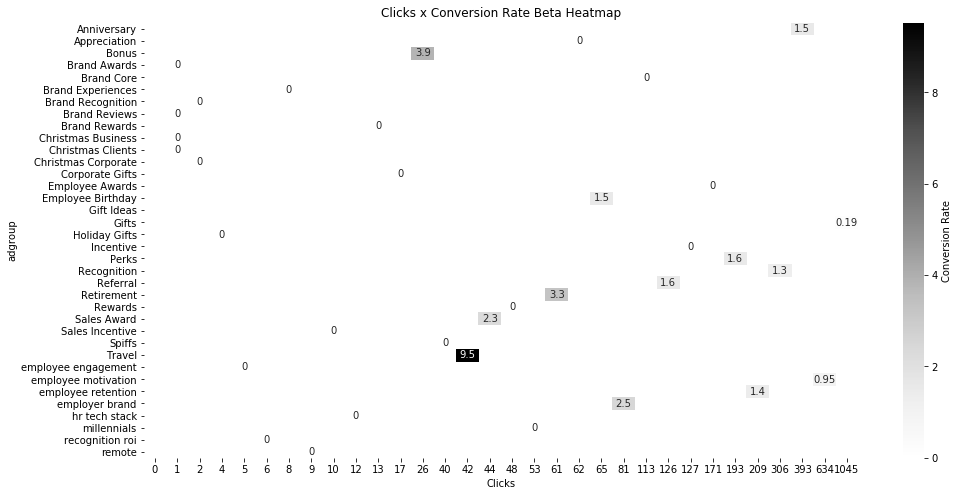

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(ag_beta.pivot("adgroup","Clicks","CR"), cmap="Greys", annot=True, cbar_kws={'label': 'Conversion Rate'})
plt.title('Clicks x Conversion Rate Beta Heatmap')

In [12]:
charlie = df[df['Type']=='Charlie']
ag_charlie = pivot_table(charlie, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Ad group', aggfunc = sum)
ag_charlie = ag_charlie[['Impr.','Clicks','Conversions','Cost']]
ratios(ag_charlie) #use function instead

ag_charlie.sort_values('Conversions',ascending=False,inplace=True)
#fix index
ag_charlie = pd.DataFrame(ag_charlie)
ag_charlie['adgroup']=ag_charlie.index
ag_charlie = ag_charlie.reset_index(drop=True)
ag_charlie=ag_charlie[['adgroup','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]

Text(0.5, 1, 'Clicks x Conversion Rate Charlie Heatmap')

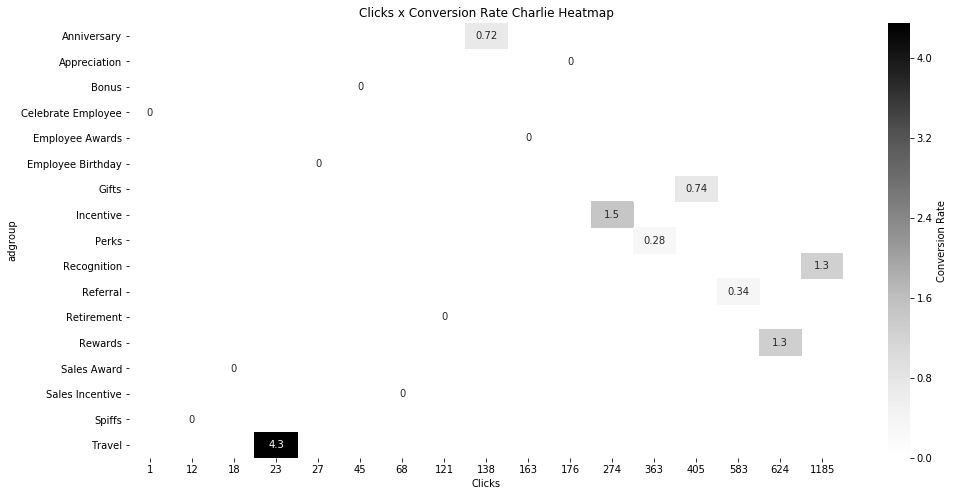

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(ag_charlie.pivot("adgroup","Clicks","CR"), cmap="Greys", annot=True, cbar_kws={'label': 'Conversion Rate'})
plt.title('Clicks x Conversion Rate Charlie Heatmap')

Which ad groups in charlie campaigns do we need to keep a better eye on?

________________________________________________________________________________

### Campaign Performance

In [11]:
campaign = pivot_table(df, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Campaign', aggfunc = sum)
campaign = campaign[['Impr.','Clicks','Conversions','Cost']]
campaign['CPA'] = round(campaign['Cost']/campaign['Conversions'],2)
campaign['CTR'] = round((campaign['Clicks']/campaign['Impr.'])*100,2)
campaign['CR'] = round((campaign['Conversions']/campaign['Clicks'])*100,2)
campaign = campaign[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
campaign.sort_values('Conversions',ascending=False,inplace=True)
#fix index
campaign = pd.DataFrame(campaign)
campaign['Campaign']=campaign.index
campaign = campaign.reset_index(drop=True)
campaign=campaign[['Campaign','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
campaign['CPA'] = campaign['CPA'].fillna(1000)
campaign

,Campaign,Impr.,CTR,Clicks,CR,Conversions,Cost,CPA
0,Google_Search_NB_AllGeos_Charlie,7713,54.79,4226,0.83,35,8481.19,242.32
1,Google_Search_NB_AllGeos_Beta,6877,41.02,2821,0.92,26,8437.70,324.53
2,Google_Search_NB_AllGeos_Alpha,15596,9.52,1484,0.88,13,4114.10,316.47
3,Google_Search_NB_Resources_Beta,3953,23.96,947,1.16,11,2742.58,249.33
4,Google_Search_Brand_AllGeos_Alpha,1916,22.91,439,1.37,6,318.59,53.10
5,Google_Search_Brand_AllGeos_Beta,268,51.49,138,0.00,0,607.59,inf
6,Google_Search_NB_Client_Holiday_Gifts_Alpha,126,18.25,23,0.00,0,105.96,inf
7,Google_Search_NB_Client_Holiday_Gifts_Beta,92,27.17,25,0.00,0,160.58,inf
8,Google_Search_NB_Competitor_AllGeos_Alpha,1941,5.82,113,0.00,0,805.91,inf


Text(0.5, 1, 'Clicks x Conversion Rate Alpha Heatmap')

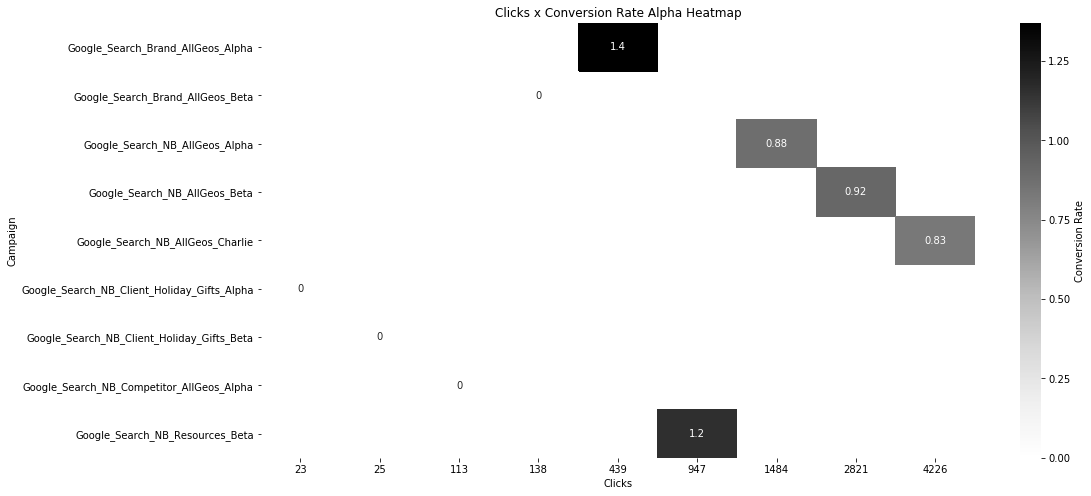

In [12]:
plt.figure(figsize=(16, 8))
sns.heatmap(campaign.pivot("Campaign","Clicks","CR"), cmap="Greys", annot=True, cbar_kws={'label': 'Conversion Rate'})
plt.title('Clicks x Conversion Rate Alpha Heatmap')

## Extra Analysis

In [18]:
df[df['Ad group']== 'Travel'].sort_values('Conversions',ascending=False)

,Search term,Match type,Added/Excluded,Campaign,Type,Ad group,Clicks,Impr.,Avg. CPC,Cost,Conversions
346,travel incentive companies,Phrase match (close variant),None,Google_Search_NB_AllGeos_Beta,Beta,Travel,3,4,8.30,24.91,1
1951,travel incentives for businesses,Phrase match (close variant),None,Google_Search_NB_AllGeos_Beta,Beta,Travel,1,1,5.90,5.90,1
1940,incentive travel planning,Phrase match,None,Google_Search_NB_AllGeos_Beta,Beta,Travel,1,1,3.69,3.69,1
1924,reward programs for travel,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Travel,1,1,6.51,6.51,1
1918,best sales incentive trips,Phrase match (close variant),None,Google_Search_NB_AllGeos_Beta,Beta,Travel,1,1,7.54,7.54,1
4066,meeting and incentive travel companies,Phrase match,None,Google_Search_NB_AllGeos_Beta,Beta,Travel,1,1,8.46,8.46,0
4469,why become a certified incentive travel profes...,Phrase match,None,Google_Search_NB_AllGeos_Beta,Beta,Travel,1,1,3.11,3.11,0
4268,travel incentive companies like cmi,Phrase match (close variant),None,Google_Search_NB_AllGeos_Beta,Beta,Travel,1,1,8.93,8.93,0
4200,incentive market river cruises,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Travel,1,1,4.78,4.78,0
4006,incentive trip motivation,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Travel,1,1,1.21,1.21,0
